In [36]:
import sqlite3
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# data_dir = "E:/DS6050-SolarFlare/solar_flare.db"
data_dir = "./solar_flare.db"

In [3]:
con = sqlite3.connect(data_dir)
cur = con.cursor()

In [4]:
flare_data = []
for row in cur.execute('SELECT * FROM flares'):
    flare_data.append(row)

In [5]:
len(flare_data)

214740

In [6]:
columns = list(map(lambda x: x[0], cur.description))

In [7]:
flares_data = pd.DataFrame(flare_data, columns=columns)
flares_data.head()

,index,Timestamp,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,...,BFLARE_LABEL_LOC,CFLARE_LOC,CFLARE_LABEL_LOC,MFLARE_LOC,MFLARE_LABEL_LOC,XFLARE_LOC,XFLARE_LABEL_LOC,XR_MAX,XR_QUAL,IS_TMFI
0,0,2015-03-14 09:24:00,3053.027399,3.409889e+10,6.918123e+23,4.603176e+13,1598.566070,4.930708e+13,2.343756e+22,-3.729736e+24,...,None,0.0,None,0.0,None,0.0,None,0.000002,12,1
1,1,2015-03-14 09:36:00,3055.748990,3.412824e+10,6.951034e+23,4.643438e+13,1606.606998,5.247000e+13,2.352953e+22,-3.586738e+24,...,None,0.0,None,0.0,None,0.0,None,0.000002,12,1
2,2,2015-03-14 09:48:00,3106.621119,3.414582e+10,6.964391e+23,4.693594e+13,1589.367379,5.120651e+13,2.351925e+22,-3.548442e+24,...,None,0.0,None,0.0,None,0.0,None,0.000001,12,1
3,3,2015-03-14 10:00:00,3062.527456,3.403375e+10,6.969886e+23,4.702157e+13,1597.128803,5.222123e+13,2.359761e+22,-3.410476e+24,...,None,0.0,None,0.0,None,0.0,None,0.000001,12,1
4,4,2015-03-14 10:12:00,3062.468265,3.394193e+10,6.951131e+23,4.704003e+13,1574.773616,5.116863e+13,2.361854e+22,-3.453983e+24,...,None,0.0,None,0.0,None,0.0,None,0.000001,12,1


In [8]:
flares_data.describe()

,index,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,...,CFLARE,MFLARE,XFLARE,BFLARE_LOC,CFLARE_LOC,MFLARE_LOC,XFLARE_LOC,XR_MAX,XR_QUAL,IS_TMFI
count,214740.000000,213761.000000,2.137610e+05,2.137610e+05,2.137610e+05,213761.000000,2.137610e+05,2.137610e+05,2.137610e+05,213761.000000,...,214740.000000,214740.000000,214740.000000,214740.000000,214740.000000,214740.000000,214740.000000,2.147400e+05,214740.000000,214740.000000
mean,29.500000,3847.057691,5.689786e+10,1.077415e+24,7.061208e+13,544.475360,2.013743e+13,4.771086e+22,-1.390827e+25,10523.251596,...,0.035229,0.007311,0.000545,0.004070,0.034712,0.007311,0.000545,-7.432169e+02,11.882132,0.953409
std,17.318143,2847.119133,5.000605e+10,1.103613e+24,4.813006e+13,567.471337,1.839255e+13,3.609880e+22,1.138505e+25,4659.134836,...,0.185265,0.085192,0.023336,0.064539,0.183963,0.085192,0.023336,8.588884e+03,1.114296,0.210762
min,0.000000,237.464273,1.819889e+09,1.987425e+22,5.204836e+12,0.014655,1.708205e+10,2.145068e+21,-7.793319e+25,794.041386,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.999900e+04,0.000000,0.000000
25%,14.750000,2058.661580,2.529200e+10,3.834652e+23,4.021721e+13,157.436099,6.939840e+12,2.455929e+22,-1.913274e+25,6885.668828,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.972100e-07,12.000000,1.000000
50%,29.500000,2947.215557,4.032329e+10,7.082231e+23,5.676542e+13,362.708193,1.444439e+13,3.578709e+22,-1.010929e+25,9940.051455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.253900e-06,12.000000,1.000000
75%,44.250000,4621.431490,7.110275e+10,1.318020e+24,8.501660e+13,744.398803,2.800378e+13,5.994219e+22,-6.429046e+24,13747.447947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.130900e-06,12.000000,1.000000
max,59.000000,14339.426366,2.547652e+11,5.384169e+24,2.423428e+14,4084.210835,1.085462e+14,2.077737e+23,3.770667e+24,25556.997616,...,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,9.329300e-04,12.000000,1.000000


In [9]:
flares_data.dtypes

index                 int64
Timestamp            object
TOTUSJH             float64
TOTBSQ              float64
TOTPOT              float64
TOTUSJZ             float64
ABSNJZH             float64
SAVNCPP             float64
USFLUX              float64
TOTFZ               float64
MEANPOT             float64
EPSZ                float64
MEANSHR             float64
SHRGT45             float64
MEANGAM             float64
MEANGBT             float64
MEANGBZ             float64
MEANGBH             float64
MEANJZH             float64
TOTFY               float64
MEANJZD             float64
MEANALP             float64
TOTFX               float64
EPSY                float64
EPSX                float64
R_VALUE             float64
CRVAL1              float64
CRLN_OBS            float64
CRLT_OBS            float64
CRVAL2              float64
HC_ANGLE            float64
SPEI                  int64
LAT_MIN             float64
LON_MIN             float64
LAT_MAX             float64
LON_MAX             

## Description of Magnetic Field Parameters

24 out of 56 variables are magnetic field parameters.

* ABSNJZH: Absolute value of the net current helicity in G2/m
* EPSX: Sum of X-component of normalized Lorentz force
* EPSY: Sum of Y-component of normalized Lorentz force
* EPSZ: Sum of Z-component of normalized Lorentz force
* MEANALP: Mean twist parameter
* MEANGAM: Mean inclination angle
* MEANGBH: Mean value of the horizontal field gradient
* MEANGBT: Mean value of the total field gradient
* MEANGBZ: Mean value of the vertical field gradient
* MEANJZD: Mean vertical current density
* MEANJZH: Mean current helicity
* MEANPOT: Mean photospheric excess magnetic energy density
* MEANSHR: Mean Shear angle
* R_VALUE: Total unsigned flux around high gradient polarity inversion lines using Blos component
* SAVNCPP: Sum of the absolute value of the net current per polarity
* SHRGT45: Area with shear angle greater than 45 degrees
* TOTBSQ: Total magnitude of Lorentz force
* TOTFX: Sum of X-component of Lorentz force
* TOTFY: Sum of Y-component of Lorentz force
* TOTFZ: Sum of Z-component of Lorentz force
* TOTPOT: Total photospheric magnetic energ density
* TOTUSJH: Total unsigned current helivity
* TOTUSJZ: Total unsigned vertical current
* USFLUX: Total unsigned flux of Maxwells

# To-Do
Propose doing the data cleaning and preparation concurrently to ensure we are efficiently using all of our time.

## Data Cleaning/Preparation
1. Convert Timestamp to datetime format
2. Check for continuous Timestamps (should be every 12 seconds)
   - If there are discontinous times, that data may be found in the non-flares table in SQL
3. Once we have continuous spans of data, need to normalize and window the data

In [20]:
flares_data["Timestamp"] = [datetime.strptime(date, "%Y-%m-%d %H:%M:%S") for date in flares_data["Timestamp"]]

In [28]:
# List of tuples where the first item of the tuple is
# the beginning index and the second item is the ending
# index of a continuous timeframe of data
continuous_range = []
for i in range(len(flares_data)-2):
    datetime_end = flares_data.loc[:,"Timestamp"].iloc[i+1]
    datetime_start = flares_data.loc[:,"Timestamp"].iloc[i]
    minutes_diff = (datetime_end - datetime_start).total_seconds() / 60.0
    if minutes_diff == 12:
        j = i + 1
        minutes_diff2 = 12
        while minutes_diff2 == 12:
            datetime_end2 = flares_data.loc[:,"Timestamp"].iloc[j+1]
            datetime_start2 = datetime_start = flares_data.loc[:,"Timestamp"].iloc[i]
            minutes_diff2 = (datetime_end2 - datetime_start2).total_seconds() / 60.0
            j += 1
        continuous_range.append((datetime_start, flares_data.loc[:,"Timestamp"].iloc[j-1]))

In [29]:
len(continuous_range)

211161

## Quality Investigation

In [12]:
flares_data.shape

(214740, 56)

Text(0, 0.5, 'Sample Number')

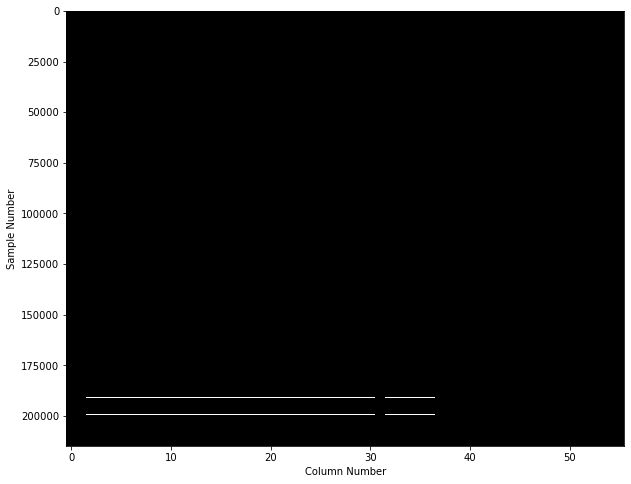

In [15]:
plt.figure(figsize=(10,8))
plt.imshow(flares_data.isna(),
           aspect = 'auto',
           interpolation = 'nearest',
           cmap = 'gray')
plt.xlabel('Column Number')
plt.ylabel('Sample Number')

This figure shows on the y-axis each of the 360'000 individual samples, and on the x-axis if any of the 67 features contains a missing value.

<AxesSubplot:>

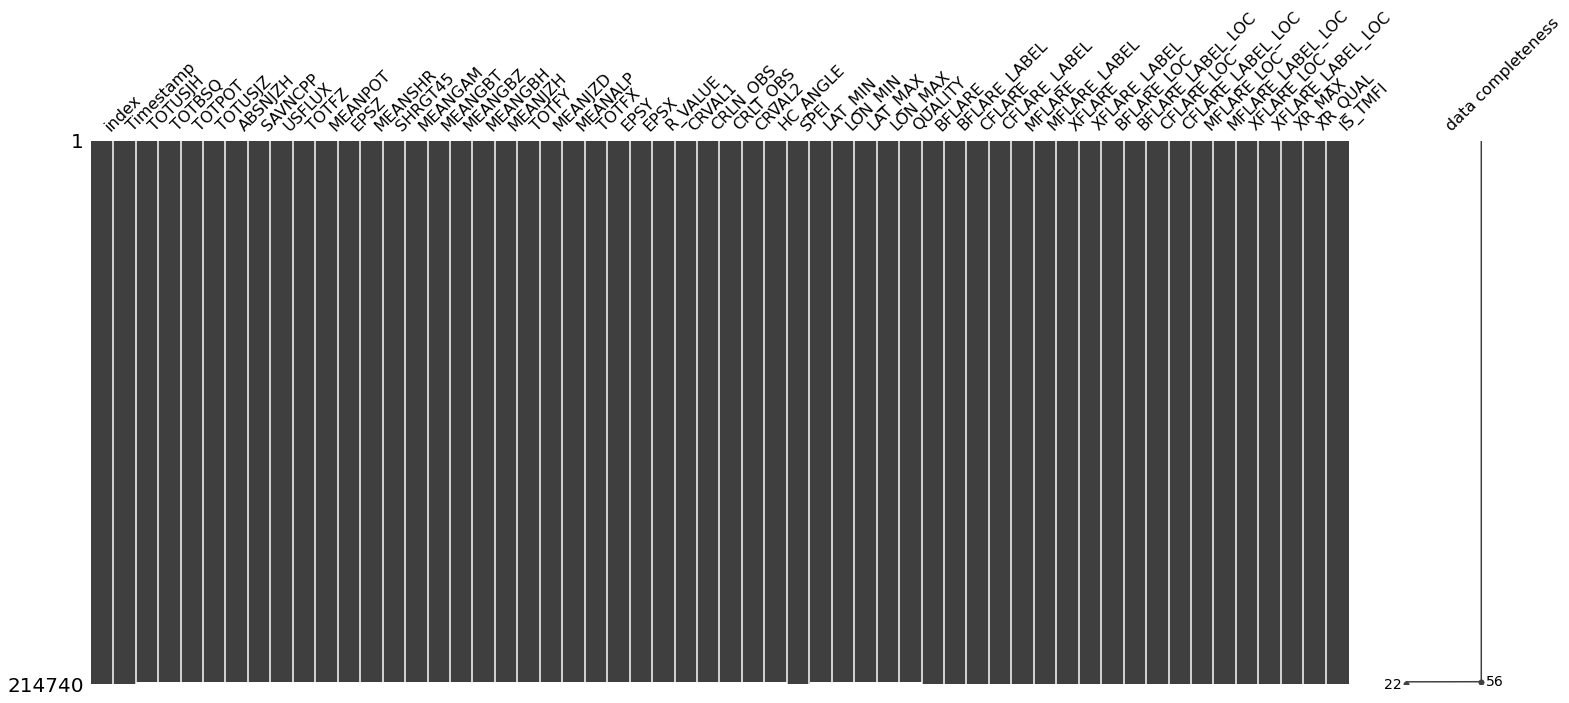

In [16]:
import missingno as msno

msno.matrix(flares_data,
           labels = True,
           sort = 'descending')

In [ ]:
# flares_data = flares_data.dropna(thresh = flares_data.shape[1] * 0.8,
#                                  axis = 0).reset_index(drop = True)
# flares_data.shape

### Missing Values Per Feature

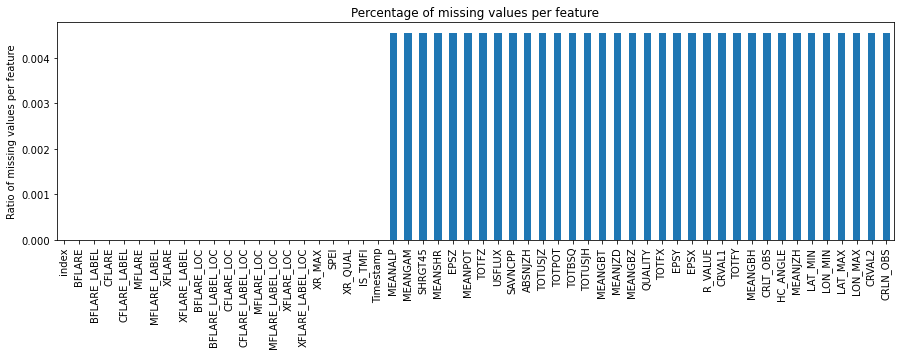

In [17]:
flares_data.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
# flares_data = flares_data.dropna(thresh=flares_data.shape[0] * 0.85, axis=1)
# flares_data.shape

## Duplicates

In [33]:
dup_df = flares_data.groupby(flares_data.columns.tolist(),as_index=False).size()
dup_df[dup_df['size'] > 1].shape[0]

0

## EDA

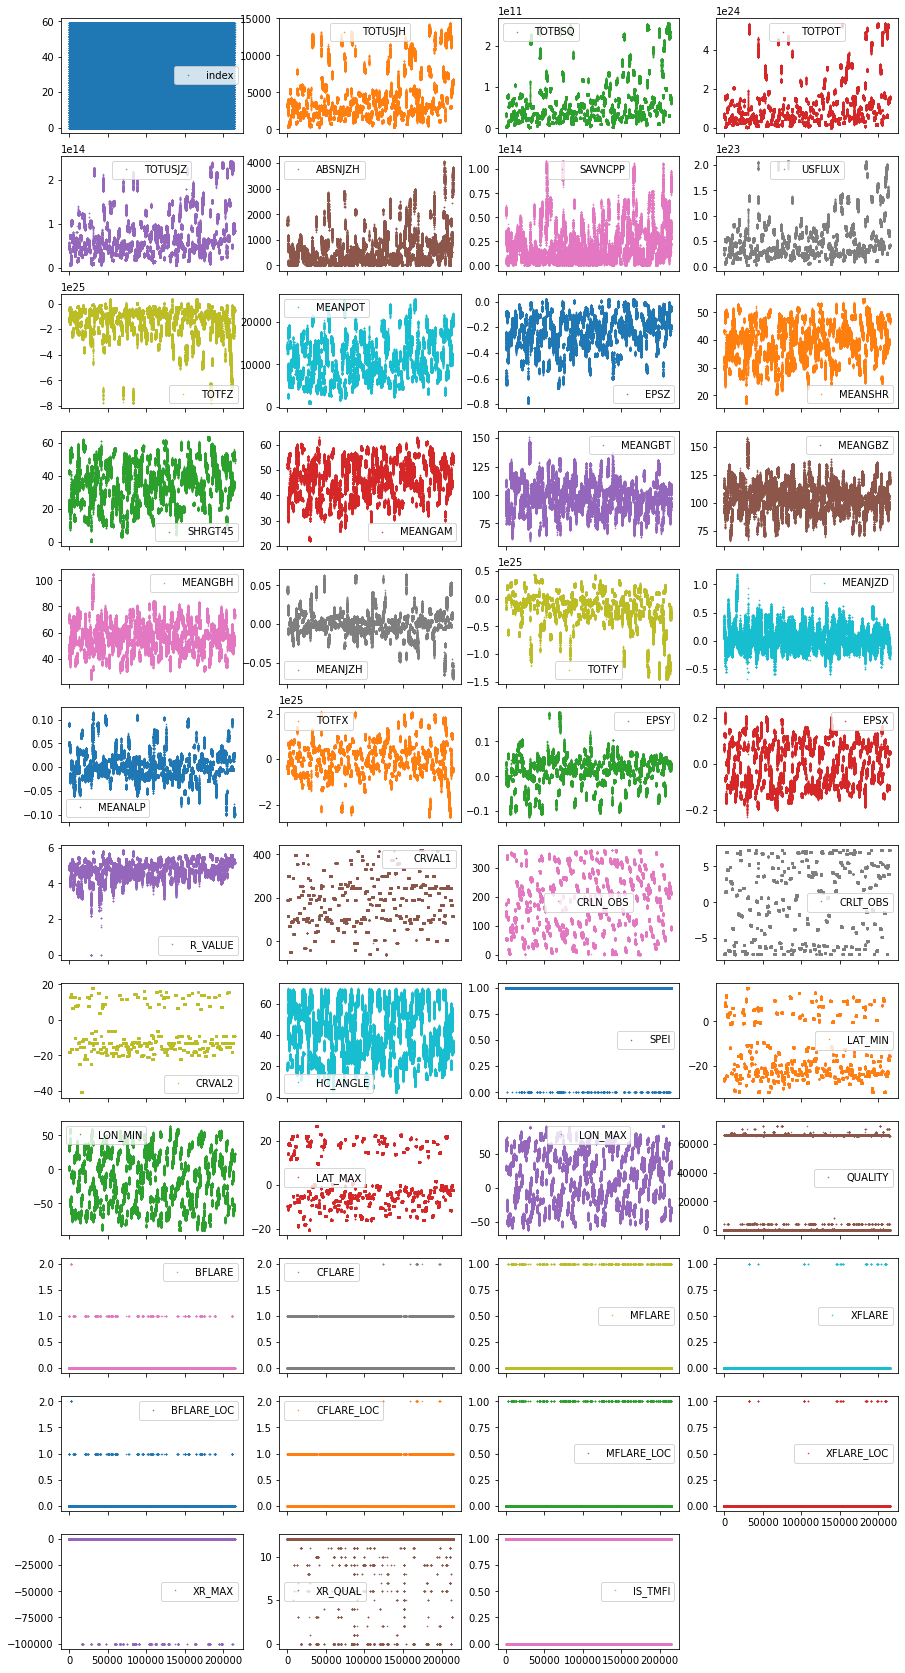

In [34]:
flares_data.plot(lw=0, 
                 marker=".", 
                 subplots=True, 
                 layout=(-1, 4),
                 figsize=(15, 30), 
                 markersize=1);

## Content Investigation

### Feature Distribution

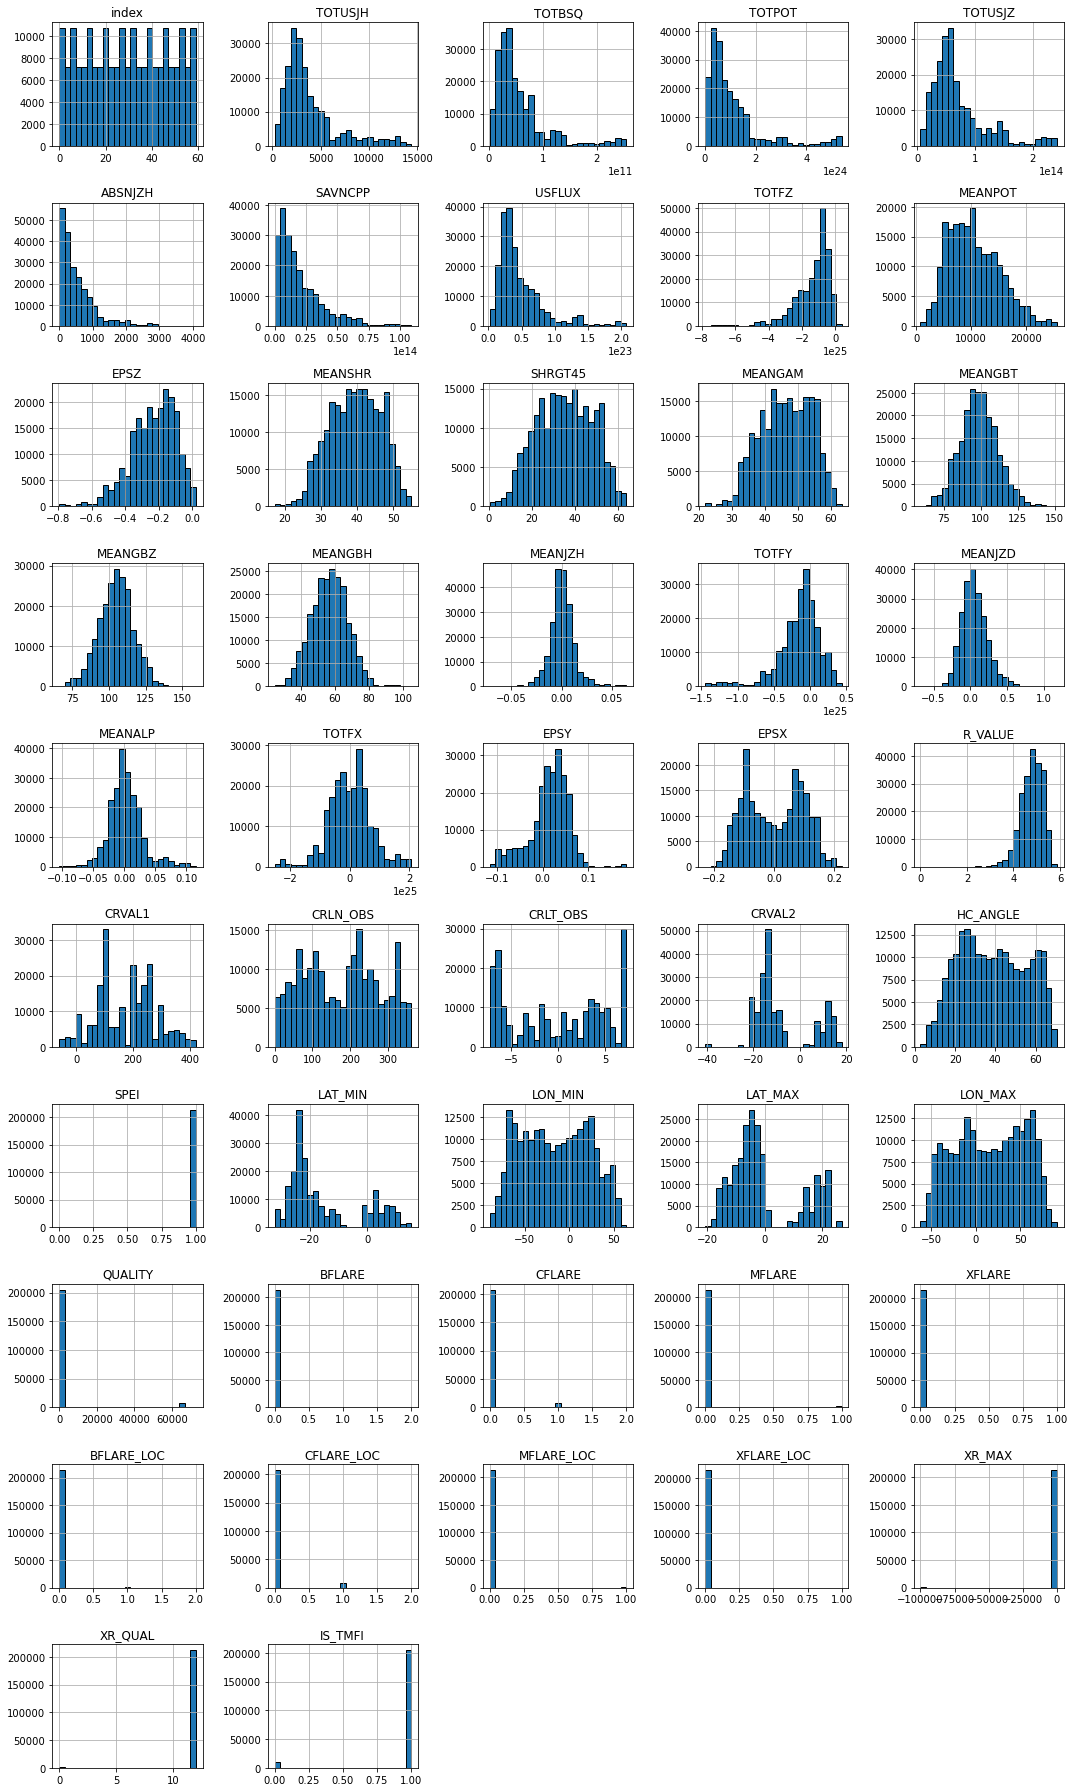

In [39]:
flares_data.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

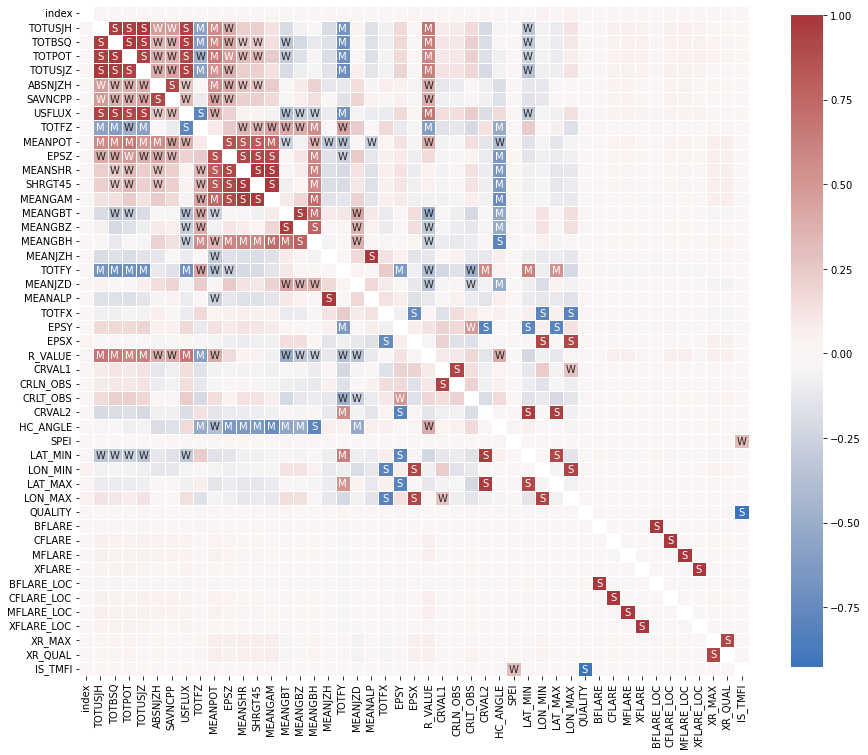

In [38]:
flares_data_corr = flares_data.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(flares_data_corr)>0.75, "S",
                  np.where(np.abs(flares_data_corr)>0.5, "M",
                           np.where(np.abs(flares_data_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(flares_data_corr, mask=np.eye(len(flares_data_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

# To-Do
Propose doing the data cleaning and preparation concurrently to ensure we are efficiently using all of our time.

## Build Modeling Framework
1. Build tuning into our model (may or may not use it depending on run time)
2. Build pipeline to speed up future model iterations (like when we implement PCA)
3. Build code to compare regular PCA (linear) and KernelPCA (non-linear) on parameters
   - Since normalization is included in data cleaning, assume data will need to be provided standardized